# The Artificial Neural Network Algorithm (training part)

## 1. Import packages 

In [7]:
import torch
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.impute import SimpleImputer as SI

## 2. Data uploading and preprocessing 

Upload the training data from .csv file

In [8]:
data = pd.read_csv("new_data.csv")

Then, remove features that are irrelevent to the game result and normalize the remaining attributes' values 

In [9]:
SI = SI()
scaler = MMS(feature_range=(0,1))
X = data.drop(['gameDuration','gameId','seasonId','creationTime','winner'],axis=1).values#delete the meaningless features
#X = SI.fit_transform(X)
#X = scaler.fit_transform(X)
#X_test = Test.drop(['gameId','seasonId','creationTime','winner'],axis=1).values
#X_test = SI.fit_transform(X_test)
#X_test = scaler.fit_transform(X_test)
y = data['winner'] - 1# extract the standard training result
#y_test = Test["winner"] - 1


#X_test = torch.FloatTensor(X_test)
#y_test = torch.LongTensor(y_test)
X_train = torch.FloatTensor(X)
y_train = torch.LongTensor(y)# transform the training set into tensor type

## 3. Model defining and training

Define the ANN class and instantiate it.

In [10]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_1 = nn.Linear(in_features=16,out_features=17)#in_features = number of features
        self.output = nn.Linear(in_features=17,out_features=2)#out_features = kinds of output
    def forward(self,x):
        x = torch.sigmoid(self.hidden_1(x))
        x = self.output(x)
        x = F.softmax(x,dim=1)
        return x
model = ANN()

In [11]:
index = []
for rate in np.arange(0.01,0.9,0.01):
    cost = nn.CrossEntropyLoss()
    back_propagation = torch.optim.Adam(model.parameters(),lr=rate)
    back_propagation.zero_grad()
    epochs = 200
    errors = []
    #index = []
    for i in range(epochs):
        y_hat = model.forward(X_train)
        error = cost(y_hat,y_train)
        errors.append(error)
        back_propagation.zero_grad()
        error.backward()
        back_propagation.step()
        #index.append(i)
        #print(f"Epoch :{i} Loss:{error}")
        
    index.append(error)
    



## 4. Training result

Min_error:0.33189308643341064 Rate:0.19


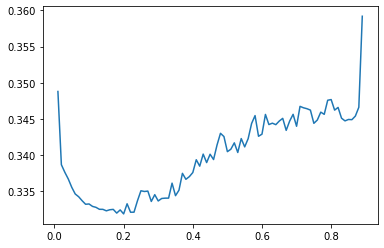

In [12]:
plt.plot(np.arange(0.01,0.9,0.01),index[:])
#plt.plot(index[:],errors[:])
min_error = np.min(index[:])
min_rate = np.argmin(index[:])
print(f"Min_error:{min_error} Rate:{0.01*min_rate}")